Implement the non-parametric Locally Weighted Regression algorithm in
order to fit data points. Select appropriate data set for your experiment and draw graphs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Data=("/content/heart.csv")
df= pd.read_csv(Data)

In [3]:
X= df['age'].values.reshape(-1,1)
y= df['trestbps'].values

In [18]:
def locally_weighted_regression(X_train,y_train,tau=0.1):
  m=len(X_train)
  weights=np.zeros((m,m))
  for i in range(m):
    diff= X_train-X_train[i]
    weights[:,i]=np.exp(-np.sum(diff**2,axis=1)/(2*tau**2) )
  X_train = np.hstack((np.ones((m,1)), X_train))
  theta = np.linalg.inv(X_train.T@weights@X_train) @ (X_train.T@weights@y_train)
  return theta
theta= locally_weighted_regression(X,y,tau=0.1)
print("Calculated theta(coefficients):",theta)

Calculated theta(coefficients): [96.14425642  0.64837357]


In [20]:
def predict(X, theta):
  X= np.hstack((np.ones((X.shape[0],1)), X))
  return X @ theta
y_pred = predict(X, theta)

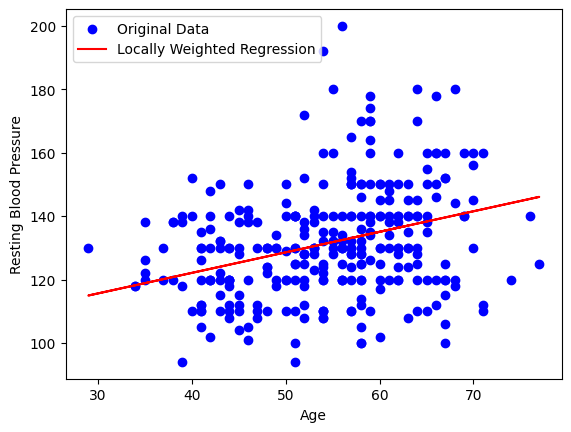

In [22]:
plt.scatter(X, y, color='blue', label="Original Data")
plt.plot(X, y_pred, color='red', label="Locally Weighted Regression")
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend()
plt.show()